In [25]:
import time
from   matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from   sklearn.cluster import KMeans, MiniBatchKMeans
from   sklearn.metrics import silhouette_score

%matplotlib inline

In [2]:
CENTERS = [[-3, 3], [-3, 2], [-3, 1], [-1.5, 2], [0, 2]]
SDS     = [0.3, 0.2, 0.3, 0.5, 0.6]
N_EACH = 200

In [3]:
X = pd.DataFrame({
    'x': np.array(
        [np.random.normal(size=N_EACH, loc=CENTERS[i][0], scale=SDS[i])
         for i in range(5)]
    ).reshape(-1),
    'y': np.array(
        [np.random.normal(size=N_EACH, loc=CENTERS[i][1], scale=SDS[i])
         for i in range(5)]
     ).reshape(-1)})
X.head()

,x,y
0,-3.315173,3.670578
1,-2.861549,2.996360
2,-3.355745,2.910338
3,-3.289555,2.852303
4,-3.216803,2.850929


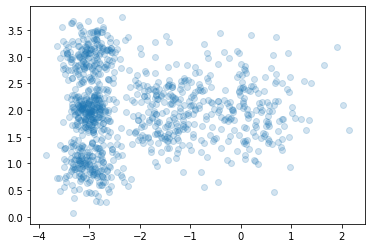

In [4]:
plt.scatter(X.x, X.y, alpha=0.2);

In [5]:
K = 5
start = time.time()
kmeans = KMeans(n_clusters=K, n_init=20)
X['preds1'] = kmeans.fit_predict(X)
print(time.time() - start)

0.09242701530456543


In [6]:
def rand_color():
    vals = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 
            'c', 'd', 'e', 'f']
    return '#' + ''.join(np.random.choice(vals, size=6, replace=True))

rand_color()

'#61c82a'

In [7]:
def plot_clusters(X, cluster_col):
    for k in range(X[cluster_col].max() + 1):
        plt.scatter(X.loc[X[cluster_col] == k, 'x'], 
                    X.loc[X[cluster_col] == k, 'y'], 
                    color=rand_color(),
                    alpha=0.2);

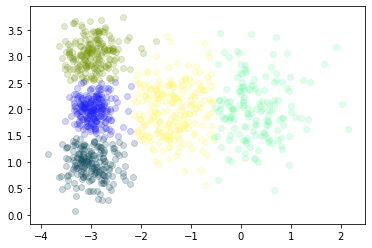

In [8]:
plot_clusters(X, 'preds1')

In [9]:
start = time.time()
minib_kmeans = MiniBatchKMeans(n_clusters=K)
X['preds2'] = minib_kmeans.fit_predict(X)
print(time.time() - start)

0.028677940368652344


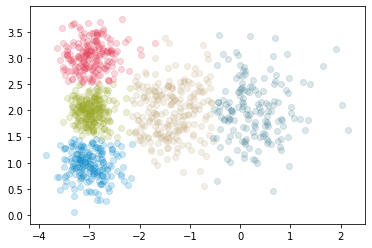

In [10]:
plot_clusters(X, 'preds2')

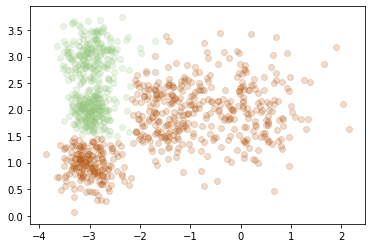

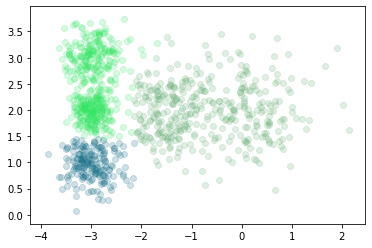

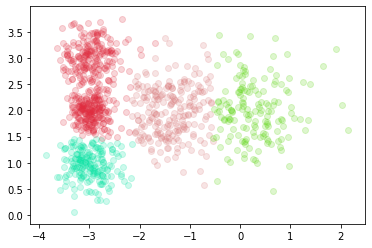

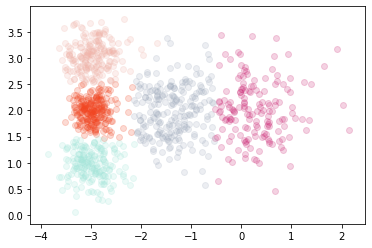

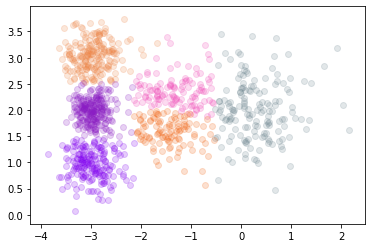

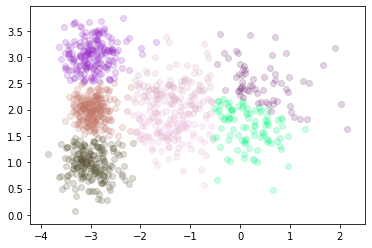

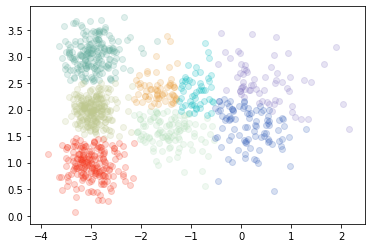

In [11]:
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k)
    X[f'{k}cluster'] = kmeans.fit_predict(X)
    plt.figure()
    plot_clusters(X, f'{k}cluster')

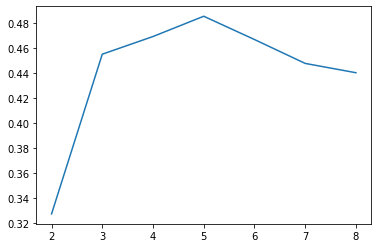

In [12]:
silhouettes = [silhouette_score(X[['x', 'y']], X[f'{k}cluster']) 
               for k in range(2, 9)]
plt.plot(list(range(2, 9)), silhouettes);

# Clustering for image segmentation

In [43]:
IMG = '../../../images'

In [44]:
image = imread(f'{IMG}/parrot.png')
image.shape

(340, 453, 3)

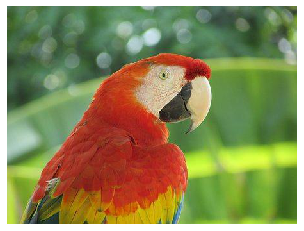

In [49]:
plt.imshow(image)
plt.axis('off');

In [45]:
X = image.reshape(-1, 3)
X.shape

(154020, 3)

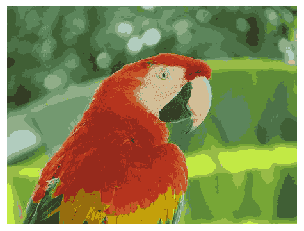

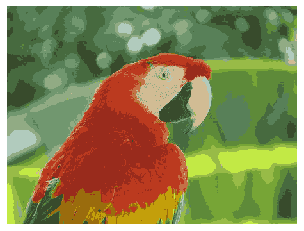

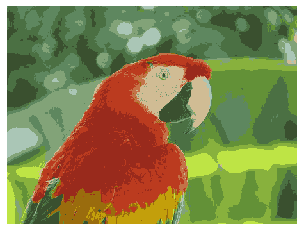

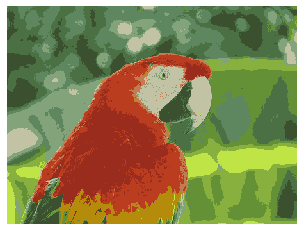

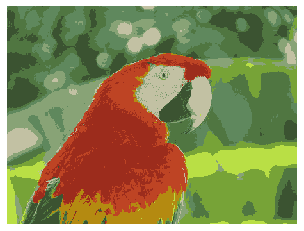

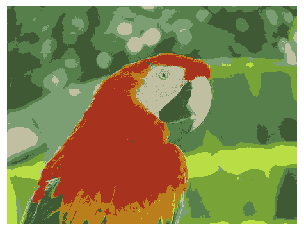

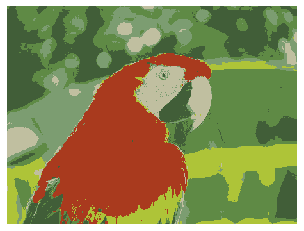

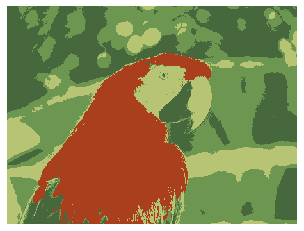

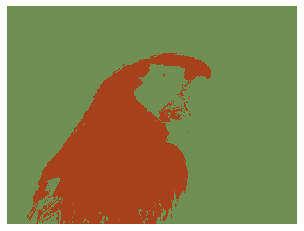

In [50]:
for k in range(18, 1, -2):
    kmeans = KMeans(n_clusters=k).fit(X)
    seg_img = kmeans.cluster_centers_[kmeans.labels_].reshape(image.shape)
    plt.figure()
    plt.imshow(seg_img)
    plt.axis('off');